In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

In [3]:
# Step 1: Data Preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    brightness_range=[0.8, 1.2],  # Simulate lighting variations
    validation_split=0.15
)

# Load and combine default and real-world images
train_generator = train_datagen.flow_from_directory(
    'images/images/',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    'images/images/',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 12750 images belonging to 30 classes.
Found 2250 images belonging to 30 classes.


In [4]:
model_path = 'waste_classification_model_2.h5'
model = tf.keras.models.load_model(model_path)

In [5]:
import tensorflow as tf
tf.compat.v1.enable_eager_execution()

In [6]:
import tensorflow as tf
print(tf.__version__)

2.18.0


In [7]:
import tensorflow as tf

tensor = tf.constant([1, 2, 3])
numpy_array = tensor.numpy() if tf.executing_eagerly() else tf.compat.v1.Session().run(tensor)
print(numpy_array)

[1 2 3]


In [8]:
import tensorflow as tf
tf.config.run_functions_eagerly(True)

In [9]:
print("Eager execution enabled:", tf.executing_eagerly())

Eager execution enabled: True


In [10]:
# Step 3: Training
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_generator, epochs=5, validation_data=val_generator)

d:\Waste_Classification\.venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5


d:\Waste_Classification\.venv\Lib\site-packages\tensorflow\python\data\ops\structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


399/399 ━━━━━━━━━━━━━━━━━━━━ 1528s 4s/step - accuracy: 0.9043 - loss: 0.2944 - val_accuracy: 0.8476 - val_loss: 0.4905
Epoch 2/5
399/399 ━━━━━━━━━━━━━━━━━━━━ 1449s 4s/step - accuracy: 0.9161 - loss: 0.2621 - val_accuracy: 0.8440 - val_loss: 0.4704
Epoch 3/5
399/399 ━━━━━━━━━━━━━━━━━━━━ 1410s 4s/step - accuracy: 0.9139 - loss: 0.2702 - val_accuracy: 0.8516 - val_loss: 0.4595
Epoch 4/5
399/399 ━━━━━━━━━━━━━━━━━━━━ 1395s 3s/step - accuracy: 0.9116 - loss: 0.2691 - val_accuracy: 0.8467 - val_loss: 0.4742
Epoch 5/5
399/399 ━━━━━━━━━━━━━━━━━━━━ 1394s 3s/step - accuracy: 0.9139 - loss: 0.2544 - val_accuracy: 0.8476 - val_loss: 0.4677


In [11]:
# Step 4: Evaluation
test_generator = train_datagen.flow_from_directory(
    'images/images/',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

loss, accuracy = model.evaluate(test_generator)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

Found 2250 images belonging to 30 classes.
71/71 ━━━━━━━━━━━━━━━━━━━━ 91s 1s/step - accuracy: 0.8413 - loss: 0.4877
Test Accuracy: 84.93%


In [12]:
model.save('models/waste_classification_model_3.h5')

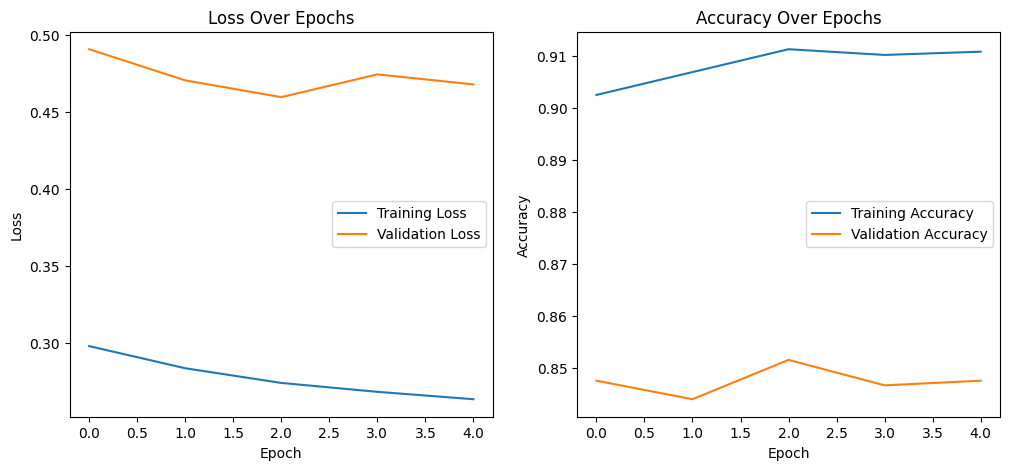

In [13]:
import matplotlib.pyplot as plt

# Plot training and validation loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()